# KNN 모델

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

# matplotlib 한글 문제
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname = "c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family = font_name)

In [3]:
final_df = pd.read_csv('C:/Users/User/ML/final_df.csv', header = 0, engine="python")
final_df = final_df.drop(columns='Unnamed: 0')
final_df.head()

,gameDuration,blueWins,blueFirstBlood,blueFirstTower,blueFirstBaron,blueFirstDragon,blueFirstInhibitor,dragonKillsDiff,baronKillsDiff,inhibitorKillsDiff,...,killsDiff,assistDiff,championDamageDealtDiff,totalGoldDiff,totalMinionKillsDiff,avgLevelDiff,killingSpreeDiff,objectDamageDealtDiff,avgKDADiff,sustainedWardsDiff
0,20분이상 30분미만,0,1,1,0,0,0,-3,0,0,...,-0.461538,-0.551724,-0.112096,-0.000965,0.029482,-0.032258,-0.333333,0.145882,-0.793510,-0.191489
1,20분이상 30분미만,0,0,1,0,0,0,-2,0,0,...,-0.571429,-0.653846,-0.189156,-0.050191,0.049394,-0.058824,-0.600000,-0.061948,-0.881579,-0.342105
2,20분이상 30분미만,1,0,0,1,1,1,-1,1,2,...,0.395349,0.469880,0.023432,0.111697,0.016393,0.064748,0.555556,0.270663,0.714286,0.030928
3,20분이상 30분미만,0,1,1,0,1,0,1,0,0,...,-0.095238,-0.278689,0.050940,-0.038586,-0.033852,-0.062500,-0.166667,-0.212191,-0.293424,-0.044444
4,30분이상 40분미만,1,1,1,0,1,1,3,0,2,...,0.166667,0.195876,0.164727,0.042377,-0.042332,0.025974,0.200000,0.374054,0.340886,-0.045455


In [4]:
game_length_bins = list(range(20, 50, 10))
game_length_bins_label = [str(x)+"분이상 "+str(x+10)+"분미만" for x in game_length_bins]

In [5]:
from sklearn import neighbors
from sklearn.model_selection import train_test_split
import sklearn.preprocessing as preprocessing
final_df.dropna()


temp = final_df['gameDuration'] == '20분이상 30분미만' #20-30 그룹의 데이터로 최적 k값 찾기
X = final_df[temp].drop(columns=['gameDuration','blueWins'])
Y = final_df[temp]['blueWins']

indices_to_keep = ~X.isin([np.nan, np.inf, -np.inf]).any(1)
X = X[indices_to_keep].astype(np.float64) 
Y = Y[indices_to_keep]
# Input contains NaN, infinity or a value too large for dtype('float64') 에러 방지

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, stratify=Y,train_size=0.7,test_size=0.3,random_state=1234)

preprocessor = preprocessing.RobustScaler()
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

100%|███████████████████████████████████████████████████████████████████████████████| 22/22 [1:45:44<00:00, 288.39s/it]


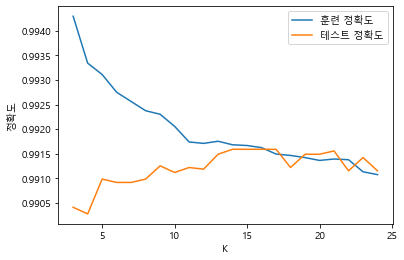

In [6]:
from tqdm import tqdm # 진행상황 표시하기 위함

training_accuracy = []
test_accuracy = []
k_settings = range(3, 25)

for k in tqdm(range(3, 25)):
    knn = neighbors.KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, Y_train)
    training_accuracy.append(knn.score(X_train, Y_train))
    test_accuracy.append(knn.score(X_test, Y_test))

# K의 변화량에 따른 예측정확도 성능 비교
plt.plot(k_settings, training_accuracy, label="훈련 정확도")
plt.plot(k_settings, test_accuracy, label="테스트 정확도")
plt.ylabel("정확도")
plt.xlabel("K")
plt.legend()

In [7]:
from itertools import compress
best_k_temp = test_accuracy==max(test_accuracy)
best_k = list(compress(k_settings, best_k_temp))[0]
print('최적의 K값:', best_k) 
print(test_accuracy)

최적의 K값: 14
[0.9904143683573254, 0.9902798331763756, 0.9909861428763622, 0.9909188752858873, 0.9909188752858873, 0.9909861428763622, 0.9912552132382618, 0.991120678057312, 0.9912215794430244, 0.9911879456477869, 0.991490649804924, 0.9915915511906364, 0.9915915511906364, 0.9915915511906364, 0.9915915511906364, 0.9912215794430244, 0.991490649804924, 0.991490649804924, 0.9915579173953989, 0.9911543118525494, 0.991423382214449, 0.9911543118525494]


In [8]:
best_k = 9 # 10 이전의 값 중 정확도가 가장 높은 k

In [9]:
from sklearn.metrics import accuracy_score

In [10]:
result_mat = pd.DataFrame(columns=['accuracy'], index =game_length_bins_label)

In [10]:
!pip install eli5

In [11]:
import eli5
from eli5.sklearn import PermutationImportance

In [12]:
for x in tqdm(game_length_bins_label):
    temp = final_df['gameDuration'] == x
    X = final_df[temp].drop(columns=['gameDuration','blueWins'])
    Y = final_df[temp]['blueWins']

    indices_to_keep = ~X.isin([np.nan, np.inf, -np.inf]).any(1)
    X = X[indices_to_keep].astype(np.float64) 
    Y = Y[indices_to_keep]
    # Input contains NaN, infinity or a value too large for dtype('float64') 에러 방지

    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, stratify=Y,train_size=0.7,test_size=0.3,random_state=1234)

    preprocessor = preprocessing.RobustScaler()
    X_train = preprocessor.fit_transform(X_train)
    X_test = preprocessor.transform(X_test)
    
    knn = neighbors.KNeighborsClassifier(n_neighbors=best_k)
    knn.fit(X_train, Y_train)
    
    Y_predict_knn = knn.predict(X_test)
    accuracy = accuracy_score(Y_test, Y_predict_knn)
    
    result_mat.loc[x]=[accuracy]

100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:57<00:00, 19.08s/it]


# KNN 모델 정확도

In [13]:
result_mat
# 시간순 (오름차순)으로 정확도 지표가 약간씩 떨어짐 확인

,accuracy
20분이상 30분미만,0.991255
30분이상 40분미만,0.971091
40분이상 50분미만,0.909314


### 변수 중요도 측정
knn 변수중요도 측정에서 컴퓨터 성능의 문제로(추정) 메모리 관련 에러.  
knn 모델은 수업시간에 배웠던 간단한 알고리즘으로도 높은 정확성이 나온다는 것을 설명하기 위함이고  
모델별 변수중요도 체크는 중요하지 않다고 판단(시간그룹별 차이에 중점을 두었음.)  
따라서 knn 모델 변수중요도 스킵

In [15]:
temp = final_df['gameDuration'] == '20분이상 30분미만' # 20-30 그룹의 변수 중요도 체크
X = final_df[temp].drop(columns=['gameDuration','blueWins'])
Y = final_df[temp]['blueWins']

indices_to_keep = ~X.isin([np.nan, np.inf, -np.inf]).any(1)
X = X[indices_to_keep].astype(np.float64) 
Y = Y[indices_to_keep]
# Input contains NaN, infinity or a value too large for dtype('float64') 에러 방지

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, stratify=Y,train_size=0.7,test_size=0.3,random_state=1234)

preprocessor = preprocessing.RobustScaler()
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

knn = neighbors.KNeighborsClassifier(n_neighbors=best_k)
knn.fit(X_train, Y_train)

perm = PermutationImportance(knn, scoring = 'accuracy', random_state = 42).fit(X_test, Y_test)

MemoryError: Unable to allocate 1.00 GiB for an array with shape (1934, 69372) and data type float64

In [ ]:
# 20-30 그룹 변수 중요도
X_test = pd.DataFrame(X_test, columns=X.columns)
eli5.show_weights(perm, feature_names = X_test.columns.tolist()) 

In [ ]:
temp = final_df['gameDuration'] == '30분이상 40분미만' # 30-40 그룹의 변수 중요도 체크
X = final_df[temp].drop(columns=['gameDuration','blueWins'])
Y = final_df[temp]['blueWins']

indices_to_keep = ~X.isin([np.nan, np.inf, -np.inf]).any(1)
X = X[indices_to_keep].astype(np.float64) 
Y = Y[indices_to_keep]
# Input contains NaN, infinity or a value too large for dtype('float64') 에러 방지

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, stratify=Y,train_size=0.7,test_size=0.3,random_state=1234)

preprocessor = preprocessing.RobustScaler()
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

knn = neighbors.KNeighborsClassifier(n_neighbors=best_k)
knn.fit(X_train, Y_train)

perm = PermutationImportance(knn, scoring = 'accuracy', random_state = 42).fit(X_test, Y_test)

In [ ]:
# 30-40 그룹 변수 중요도
X_test = pd.DataFrame(X_test, columns=X.columns)
eli5.show_weights(perm, feature_names = X_test.columns.tolist()) 

In [ ]:
temp = final_df['gameDuration'] == '40분이상 50분미만' # 40-50 그룹의 변수 중요도 체크
X = final_df[temp].drop(columns=['gameDuration','blueWins'])
Y = final_df[temp]['blueWins']

indices_to_keep = ~X.isin([np.nan, np.inf, -np.inf]).any(1)
X = X[indices_to_keep].astype(np.float64) 
Y = Y[indices_to_keep]
# Input contains NaN, infinity or a value too large for dtype('float64') 에러 방지

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, stratify=Y,train_size=0.7,test_size=0.3,random_state=1234)

preprocessor = preprocessing.RobustScaler()
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

knn = neighbors.KNeighborsClassifier(n_neighbors=best_k)
knn.fit(X_train, Y_train)

perm = PermutationImportance(knn, scoring = 'accuracy', random_state = 42).fit(X_test, Y_test)

In [ ]:
# 40-50 그룹 변수 중요도
X_test = pd.DataFrame(X_test, columns=X.columns)
eli5.show_weights(perm, feature_names = X_test.columns.tolist()) 